# 2024-03-04, Day 01

An introduction to the course and a re-introduction to single cell transcriptomics.

[Presentation](https://docs.google.com/presentation/d/1twfhltvAlx9LJ3RrkCAieD9pBrinUDJe1k_1AIipM2g/edit?usp=sharing):

- Lowering costs and improving quality made sequencing an increasingly attractive option for bio research.
- central dogma of molecular biology allows approximation of using mRNA as a proxy for cell type/state/function.
- bulk methods let us capture overall expression in group of cells; limited by what we can successfully dissect.
- modern techniques to isolate RNA from single cells - microfluidics as an example.
- what does single-cell allow that bulk/other techniques don't? Why use it in the first place?
- expression matrix as the entry point into scRNA-seq analysis.
- pairwise cell distances allow us to preserve the structure of expr matrix while reducing dimensionality (from cells x genes to cells x cells).
- what is the effect of the distance/similarity metric that we choose? How do we distill similarity/distance between cells to a single number?
- we can exploit the patterns in the cell-cell similarity matrix to find patterns:
groups of cells that are more similar to each other than the rest. This can be nested (sub-groups and super-groups). What are the biological implications? What are some examples of nested similarity structures?
- patterns can be incredibly fine-grained - to the level of one cell in an organism (C. elegans example).
- scRNA-seq is ready for production - contribution to COVID19/tumor research.
- patterns in the cell-cell similarity matrix can point towards dynamics as well:
- linear differentiation (think of examples)
- branching trajectories (what is a good example?)
- can bulk RNA-seq do the same? How does it compare?

# Introduction to scanpy and the AnnData structure

Basically, AnnData objects are a bag that contains multiple slots:

- gene expression is saved in a cells x genes matrix X
- cell metadata is saved in obs, a matrix of length cells
- gene metadata is saved in var, a matrix of length genes
- the unstructured dictionary uns holds all the things that don't fit in other places.

The AnnData website has a [very helpful overview](https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg).

# getting started

it is customary in Python to start by importing all of the necessary libraries. Here, we are going to need:

- [`scanpy`](https://scanpy.readthedocs.io/en/stable/), the Python library with data structures and functions that are useful for single-cell analysis
- [`pandas`](https://pandas.pydata.org/), a library that is devoted to working with tables
- [`numpy`](https://numpy.org/), a library that contains functions and data structures for efficiently working with matrices

Feel free to have a look inside and read a bit. NumPy and Pandas in particular are central to the Python data analysis ecosystem, and almost everything else builds on top of these.

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


we are now going to load one of the AnnData objects that comes pre-bundled with ScanPy. This is one of the most standard datasets in single-cell analysis, a small dataset with approx. 3k peripheral mononuclear blood cells.

In [2]:
adata = sc.datasets.pbmc3k()

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

Remember that when we execute something that would usually return a value, but don't put that anywhere, the value is printed instead. What we see here is a short description of the `X` slot of our object. We see that it has dimensions $2700 \times 32738$. Since AnnData lists the observations (cells) first and the variables (genes) second, this means we have 2700 cells and ~33k genes.

It also tells us that the format is "float" (what does this mean? Why could this be happening?) and that it stores close to 2.3 million elements. How full is this matrix?

In [4]:
2286884 / (2700*32738)

0.025871894253591363

it is, in fact, 97.5% empty! We then had a look at the `.obs` slot, to look for saved cell metadata:

In [5]:
adata.obs

""
index
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1


And then looked at the `.var` slot, that contained gene names as the index and gene IDs as a metadata column. We wondered whether using gene names was a good idea: can they function as identifiers? Are they unique?

In [6]:
any(adata.var.index.duplicated())

False

In [7]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

We'd already thought about possible metadata for each cell that could possibly help us perform quality control. One of these was the total amount of UMIs detected in each cell. How are we calculating it here? (hint: remember the structure of an AnnData object!)

In [8]:
adata.obs["total_reads_per_cell"] = np.array(np.sum(adata.X, axis=1))[:, 0]

In [9]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'total_reads_per_cell'
    var: 'gene_ids'

we see that the new column was added successfully. Next, we have a look at the distribution of our new quality control metric, using the helpful fact that Pandas dataframes (like the .obs slot) have their own visualisation functions (such as `hist`).

<Axes: >

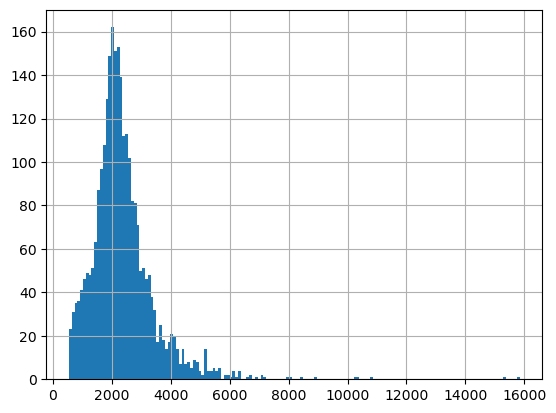

In [10]:
adata.obs["total_reads_per_cell"].hist(bins=160)

What two things did we notice here? What does that let us know/suspect about the nature of the data?

Another measure we'd thought of was the number of genes expressed in each cell. We agreed, for now, to consider every gene having at least one (1) count as being expressed. How did we calculate this new metadata column? What property of Python (and other languages) did we make use of?

In [11]:
adata.obs["genes_expressed"] = np.array(np.sum(adata.X > 0, axis=1))[:, 0]

<Axes: >

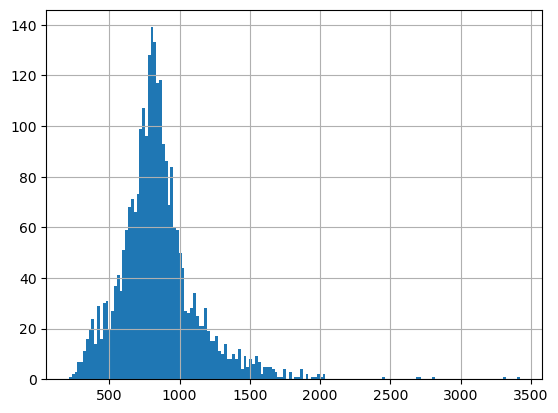

In [12]:
adata.obs["genes_expressed"].hist(bins=160)

How is this histogram similar/different from the previous one? What do we notice/what do we suspect?

We hypothesised there might be some correlation between these two variables. We looked at it, using the `scatter` function from the Scanpy plotting suite.

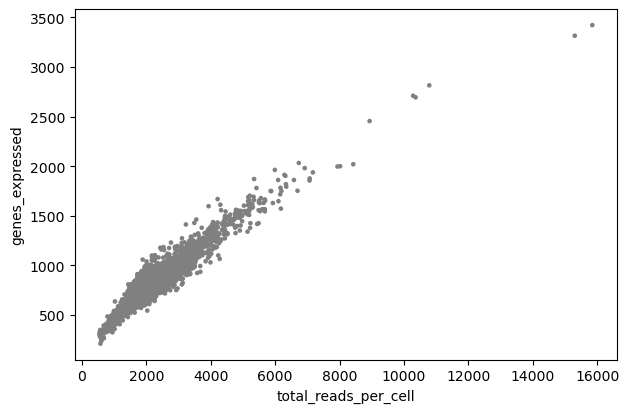

In [13]:
sc.pl.scatter(adata, "total_reads_per_cell", "genes_expressed")

What do we learn from this? Is this expected/unexpected? How does this relate to the biochemistry/capture/sequencing strategy of the single-cell RNA-seq experiments?

Afterwards, we started looking at the same ideas (total counts/total cells expressing) but for genes. The histograms looked very, very different here!

In [14]:
adata.var["total_reads_per_gene"] = np.array(np.sum(adata.X, axis=0))[0]

<Axes: >

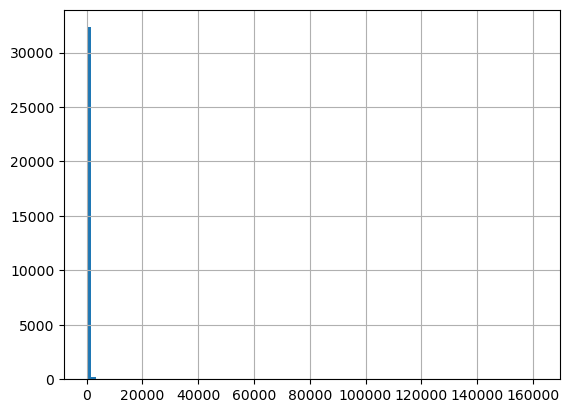

In [15]:
adata.var["total_reads_per_gene"].hist(bins=100)

Why is that? What do we learn from this?

# Homework

- read the [AnnData tutorial](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html#Initializing-AnnData) - feel free to work through it.
- read the ScanPy tutorial where the usual workflow is [walked through](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html). For those of you that visited the R single-cell course this should be a refresher, but in Python. Try to follow it.
- How would you create a new metadata column for each gene that measured how many cells express each gene? What would you expect? Will that correlate with total UMIs per gene?
- another useful quality control metric for each gene is its average expression and its variance. Try to calculate those! Why would they be interesting/important?